<a href="https://colab.research.google.com/github/owen-wang-student/tensorflow-practice/blob/main/food_cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data
3. Create a baseline model
4. Fit the model (try to overfit)
5. Evaluate the model
6. Adjust hyperparameters and improve model

## Import Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-08 15:36:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  99.7MB/s    in 5.1s    

2024-08-08 15:36:42 (97.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir) # turn directory into python path object
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # .glob(*) returns all existing files matching pattern
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Helper function to visualize iamges
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplot lib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 500, 3)


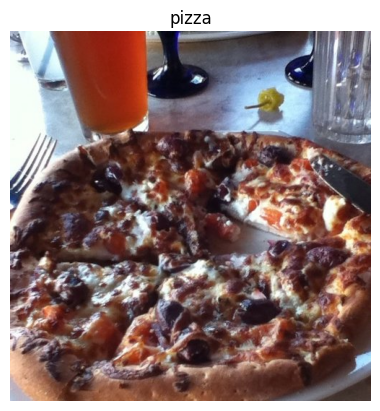

In [6]:
# Visualize the data
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess Data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Turn data into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

len(train_data), len(test_data)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(235, 79)

## Create a baseline model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Set the random seed
tf.random.set_seed(42)

# Create our model
model = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data, epochs=5, validation_data=test_data) # auto calculates steps/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 169ms/step - accuracy: 0.1918 - loss: 2.2090 - val_accuracy: 0.2892 - val_loss: 2.0111
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 137ms/step - accuracy: 0.3320 - loss: 1.9021 - val_accuracy: 0.3312 - val_loss: 1.9009
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.4708 - loss: 1.5713 - val_accuracy: 0.3284 - val_loss: 2.0037
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 158ms/step - accuracy: 0.6339 - loss: 1.1121 - val_accuracy: 0.3136 - val_loss: 2.4027
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 137ms/step - accuracy: 0.8294 - loss: 0.5574 - val_accuracy: 0.2920 - val_loss: 3.3272


## Evalute the model

In [9]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.2978 - loss: 3.3404


[3.3271613121032715, 0.2919999957084656]

In [12]:
# Helper function to plot loss curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

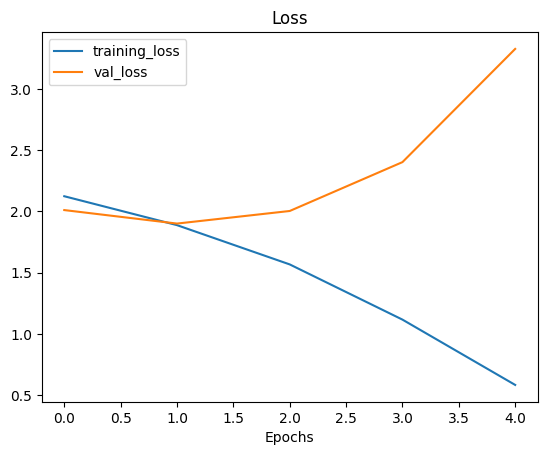

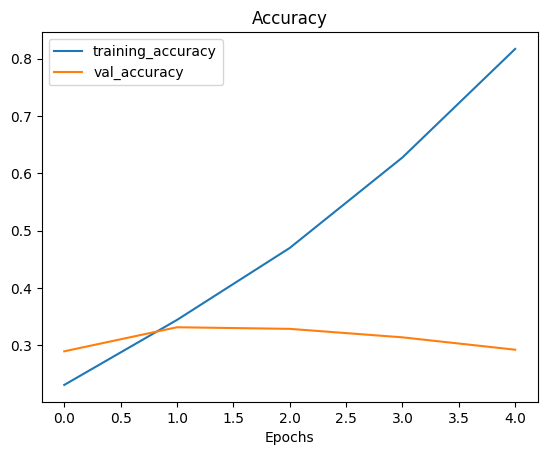

In [13]:
# Plot the model's loss curves
plot_loss_curves(history) # very clear overfitting is seen

## Reduce overfitting

1. changing number of conv2d layers
2. data augmentation

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [21]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [19]:
# Create another model fitted on augmented training data
model_2 = tf.keras.models.clone_model(model)

# Compile cloned model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
# Fit the model
history_2 = model_2.fit(train_data_augmented, epochs=5, validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 442ms/step - accuracy: 0.1620 - loss: 2.2382 - val_accuracy: 0.2584 - val_loss: 2.0549
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 430ms/step - accuracy: 0.2398 - loss: 2.1005 - val_accuracy: 0.3136 - val_loss: 1.9448
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 429ms/step - accuracy: 0.2694 - loss: 2.0609 - val_accuracy: 0.3156 - val_loss: 1.9217
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 429ms/step - accuracy: 0.2960 - loss: 2.0056 - val_accuracy: 0.3332 - val_loss: 1.8558
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 423ms/step - accuracy: 0.3087 - loss: 1.9584 - val_accuracy: 0.3888 - val_loss: 1.7543


In [24]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.3806 - loss: 1.7625


[1.7543220520019531, 0.3887999951839447]

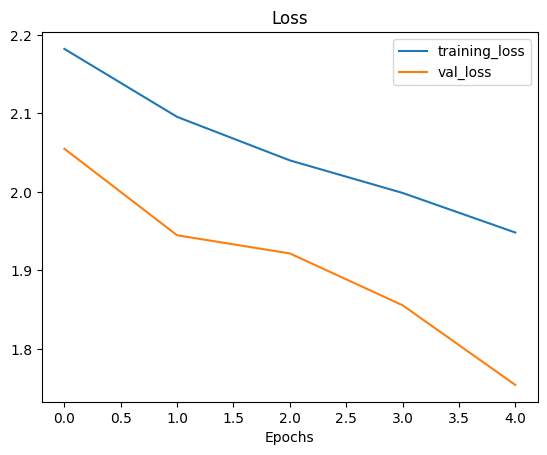

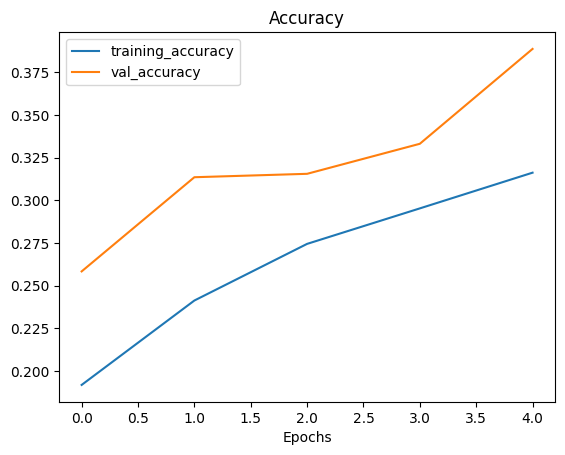

In [25]:
plot_loss_curves(history_2)

## Make predictions on custom images

In [26]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [30]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [28]:
# Helper function to load and prep image
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [34]:
# Helper function to predict and plot using model
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


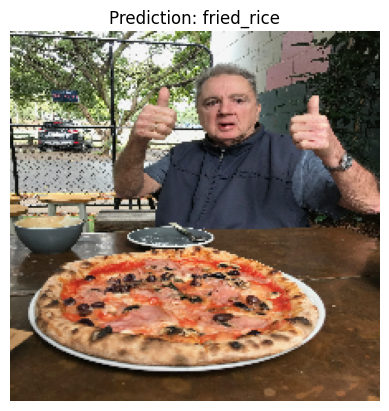

In [36]:
# Run predictions
pred_and_plot(model=model_2,
             filename="03-pizza-dad.jpeg",
             class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


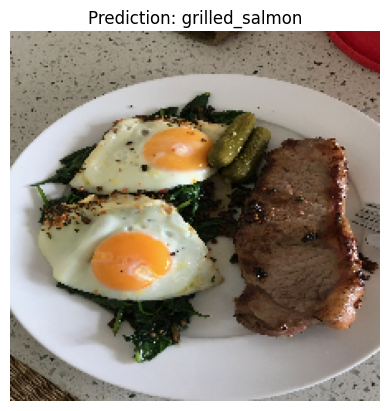

In [37]:
# Run predictions
pred_and_plot(model=model_2,
             filename="03-steak.jpeg",
             class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


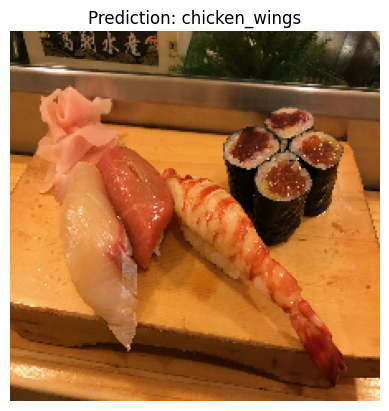

In [38]:
# Run predictions
pred_and_plot(model=model_2,
             filename="03-sushi.jpeg",
             class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


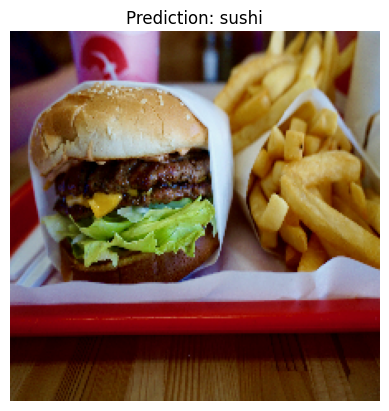

In [39]:
# Run predictions
pred_and_plot(model=model_2,
             filename="03-hamburger.jpeg",
             class_names=class_names)

## Save and load trained CNN model

In [46]:
# Save a model
model_2.save("saved_trained_model_2.h5")

In [48]:
# Load in a trained model and evaluate it
loaded_model_2 = tf.keras.models.load_model("/content/saved_trained_model_2.h5")

In [49]:
loaded_model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.3891 - loss: 1.7653


[1.7543222904205322, 0.3887999951839447]